In [187]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
from rlway.pyosrd import OSRD
from rlway.schedule_from_osrd import schedule_from_osrd

In [189]:
case = OSRD()

In [190]:
case.draw_infra()

In [191]:
case.route_lengths

{'rt.buffer_stop.0->DA_out': 500.0,
 'rt.DA_out->D0': 1950.0,
 'rt.D0->D1': 2000.0,
 'rt.D1->D2': 2000.0,
 'rt.D2->D3': 2000.0,
 'rt.D3->DB_in': 1970.0,
 'rt.DB_in->buffer_stop.1': 480.0}

<Axes: xlabel='Time', ylabel='Track sections'>

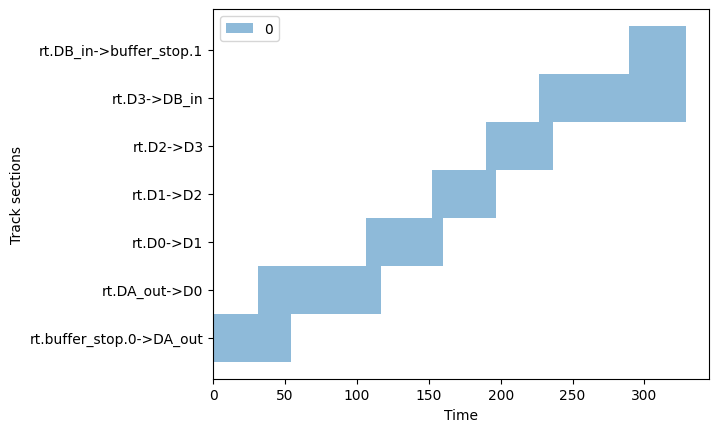

In [192]:
s = schedule_from_osrd(case)
s.plot()

<Axes: title={'center': 'train0 (eco)'}>

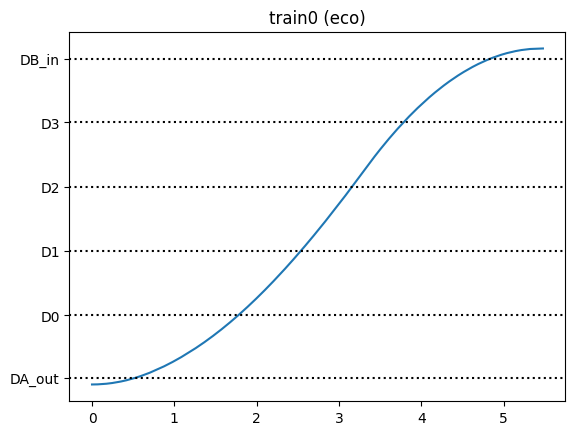

In [196]:
case.space_time_graph(0, 'eco', types_to_show=['detector', 'cvg_signal', 'station'])

In [194]:
for train, _ in enumerate(case.trains):
    blocks = s.trajectory(train)
    for idx, block in enumerate(blocks[:-1]):
        print(idx, block, blocks[idx+1])
        s._df.loc[block, (train, 'e')] = s._df.loc[blocks[idx+1], (train, 'e')]

0 rt.buffer_stop.0->DA_out rt.DA_out->D0
1 rt.DA_out->D0 rt.D0->D1
2 rt.D0->D1 rt.D1->D2
3 rt.D1->D2 rt.D2->D3
4 rt.D2->D3 rt.D3->DB_in
5 rt.D3->DB_in rt.DB_in->buffer_stop.1


<Axes: xlabel='Time', ylabel='Track sections'>

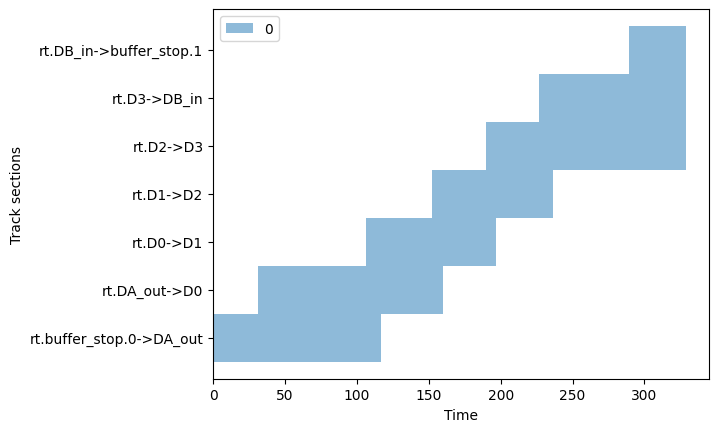

In [195]:
s.plot()